In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
ccle = pd.read_csv("/Users/michael/Downloads/amplicon_repo_datasets/ccle_aggregated_results.csv")

In [3]:
ccle["Location"] = ccle.apply(lambda x : x["Location"].replace("\"", ""), axis = 1)

In [4]:
ccle_ecdna = ccle[ccle["Classification"] == "ecDNA"]

In [5]:
locations = ccle_ecdna['Location'].to_list()

In [6]:
# function to extract lengths from input list
def process_intervals(input_list):
    interval_lengths = []
    feature_lengths = []
    
    for feature in input_list:
        # convert to list
        intervals = literal_eval(feature)
        nonempty = len(intervals) > 0 and intervals != ['']
        # compute length of each interval
        if nonempty:
            toSum = []
            for interval in intervals:
                start, end = map(int, interval.split(':')[1].split('-'))
                toSum.append(end - start)
                # add to individual list
                interval_lengths.append(end - start)
            # add to summed list
            feature_lengths.append(sum(toSum))
            
    return interval_lengths, feature_lengths

In [7]:
lengths1, lengths2 = process_intervals(locations)

In [8]:
len(lengths1), len(lengths2), len(locations)

(1144, 361, 361)

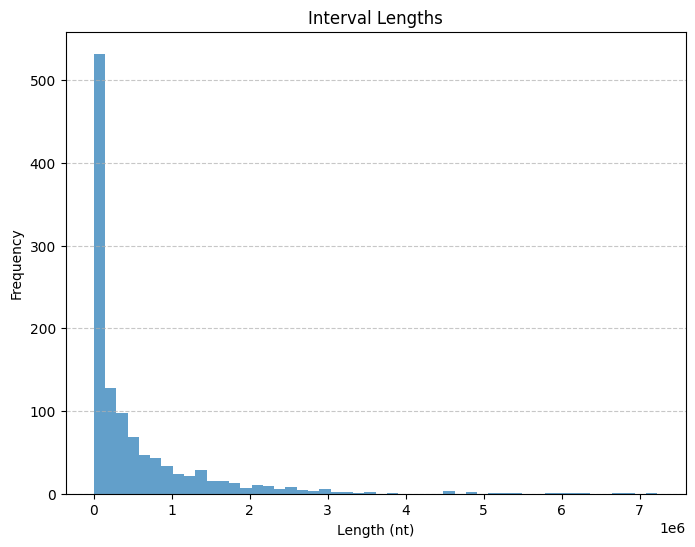

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(lengths1, bins=50, alpha=0.7)
plt.title("Interval Lengths")
plt.xlabel("Length (nt)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

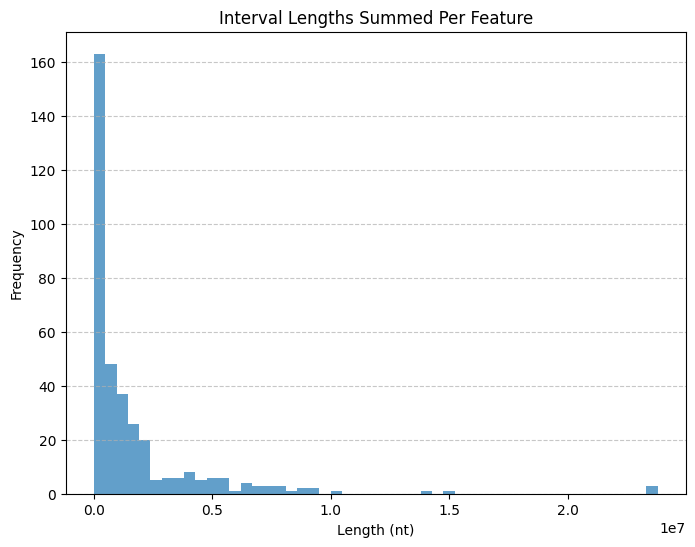

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(lengths2, bins=50, alpha=0.7)
plt.title("Interval Lengths Summed Per Feature")
plt.xlabel("Length (nt)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# function to save list to text file
def save_list_to_txt(numbers, filename):
    with open(filename, 'w') as f:
        for number in numbers:
            f.write(f"{number}\n")

In [ ]:
save_list_to_txt(lengths1, "ccle_interval_lengths.txt")
save_list_to_txt(lengths2, "ccle_interval_lengths_summed_by_feature.txt")